# <center>Centro Universitário Facens<br/></center>

## <center>Liga de IA<br/></center>
  
<font size="3"><center>Prof. Renato Moraes Silva</center></font>
<br/>

# <center>Iniciação II - Introdução ao Python para Ciência dos Dados</center>

Em tarefas de Aprendizado de Máquina e Ciência dos Dados, precisamos explorar dados disponíveis em diversos formatos e localizações. Muitas vezes é preciso executar a tarefa de *web scraping* que consiste em analisar o código html de páginas Web para navegar de forma automática e extrair dados. Porém, existem também sites onde a comunidade compartilha bases de dados. Uma dessas plataformas é o Kaggle. 

Para aprendermos alguns novos recursos do Python voltado para Ciência dos Dados iremos usar a base de dados **Bitcoin Historical Dataset** disponível em: https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd. Para isso, iremos fazer o download de um dos arquivos por meio da biblioteca **urllib.request**. Um dos métodos dessa biblioteca é o **urlretrieve** que faz o dowload de arquivos online. Para isso , basta informar a url e o nome desejado para o arquivo que será baixado.

A biblioteca `Pandas` é uma das mais importantes em tarefas que envolvem análise de dados.

Por exemplo, ela pode ser usada para abrir arquivos em .csv, .xlsx (Excel) e outros formatos de dados estruturados. 

Para abrir uma arquivo do Pandas em CSV, pode-se usar a função **read_csv**. Os principais parâmetros dela são:
 - filepath_or_buffer: o endereço do arquivo
 - sep: o separador de colunas. 
 - index_col: coluna que será usada como índice. Caso não queira nenhuma, use None.

Vamos usar para abrir o arquivo que acabamos de baixar.

In [2]:
import pandas as pd
import numpy as np

df_dataset = pd.read_csv("btc.csv",sep="," ,index_col = None)

print("Dados carregados com successo!!!")


Dados carregados com successo!!!


Agora, vamos dar uma olhada nas 10 primeiras amostras da base de dados

In [3]:
display(df_dataset.head(n=10))

#outra forma de selecionar apenas alguns valores
print(df_dataset.iloc[30:35])

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07
5,1645660800,2022-02-24 00:00:00,BTC/USD,37253.26,39720.00,34324.05,38376.88,6302.850957,2.418838e+08
6,1645574400,2022-02-23 00:00:00,BTC/USD,38269.94,39303.24,37060.16,37274.18,1778.275258,6.628375e+07
7,1645488000,2022-02-22 00:00:00,BTC/USD,37036.98,38463.88,36368.99,38269.94,2388.759035,9.141766e+07
8,1645401600,2022-02-21 00:00:00,BTC/USD,38384.09,39494.11,36810.72,37076.60,3501.420364,1.298208e+08
9,1645315200,2022-02-20 00:00:00,BTC/USD,40108.62,40151.62,37974.18,38373.90,1283.511547,4.925334e+07


          unix                 date   symbol      open      high       low  \
30  1643500800  2022-01-30 00:00:00  BTC/USD  38176.45  38378.88  37372.59   
31  1643414400  2022-01-29 00:00:00  BTC/USD  37713.14  38741.67  37327.79   
32  1643328000  2022-01-28 00:00:00  BTC/USD  37179.62  38022.11  36173.98   
33  1643241600  2022-01-27 00:00:00  BTC/USD  36824.02  37251.00  35511.32   
34  1643155200  2022-01-26 00:00:00  BTC/USD  37006.76  38946.00  36279.21   

       close   Volume BTC    Volume USD  
30  37941.82   708.794813  2.689297e+07  
31  38192.65  1296.908923  4.953239e+07  
32  37748.36  2420.654107  9.137572e+07  
33  37208.36  3103.823011  1.154882e+08  
34  36829.32  3663.155571  1.349115e+08  


Vamos dar uma olhada apenas nos nomes das colunas dessa tabela.

In [4]:
colunas = df_dataset.columns

print(colunas)

display(df_dataset[colunas[3]])

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')


0       43221.71
1       37717.10
2       39146.66
3       39242.64
4       38360.93
          ...   
2646      378.39
2647      376.40
2648      376.57
2649      376.42
2650      363.59
Name: open, Length: 2651, dtype: float64

Vamos dar uma olhada nos índices, por meio do atributo **index**.

In [5]:
indices = df_dataset.index
print(indices)

RangeIndex(start=0, stop=2651, step=1)


Para ver o tipo de dado de cada coluna use o atributo type.

In [6]:
tipoColunaLow = df_dataset['low'].dtype

tipoColunaDate = df_dataset['date'].dtype

print(tipoColunaLow)
print(tipoColunaDate)

float64
object


Para converter de um tipo para outro, use o método **astype** passando uma string como 'int', 'float', 'string', 'datetime64[ns]' (ns significa que a precisão será em nano segundos), 'float', etc.

Converta a coluna 'date' para o formato de data-hora.

In [7]:
df_dataset['date'] = df_dataset['date'].astype('datetime64[ns]')

print(df_dataset['date'].dtype)

datetime64[ns]


Você pode transformar um coluna em índice usando o método **set_index**. Isso é útil para, por exemplo, gerar gráficos, uma vez que o índice será usado como rótulo do eixo X. 

Por outro lado, para converter um índice em coluna, use **reset_index**, passando o parâmetro **drop=False**.

Use isso para transformar a coluna date em índice. 

In [8]:
df_dataset = df_dataset.set_index('date')
display(df_dataset)

#voltar a data como colunas em vez de indice
df_dataset = df_dataset.reset_index(drop = False) #se drop = True exclue a coluna data

display(df_dataset)

#voltar para indice novamente
df_dataset = df_dataset.set_index('date')
display(df_dataset)

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...
2014-12-02,1417478400,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2014-12-01,1417392000,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-11-30,1417305600,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03


,date,unix,symbol,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,2014-12-02,1417478400,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,2014-12-01,1417392000,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,2014-11-30,1417305600,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,2014-11-29,1417219200,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...
2014-12-02,1417478400,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2014-12-01,1417392000,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-11-30,1417305600,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03


Podemos selecionar um coluna qualquer para executar uma determinada tarefa, como por exemplo visualizar seus valores na forma de um gráfico. Vamos plotar os valores coluna "close" usando a função **plot** do Pandas. Para uma melhor visualização, você pode rotacionar os labels do eixo **x** usando o método **xticks** da biblioteca **matplotlib.pyplot** passando o parâmetro **rotation=grauRotacao**. 

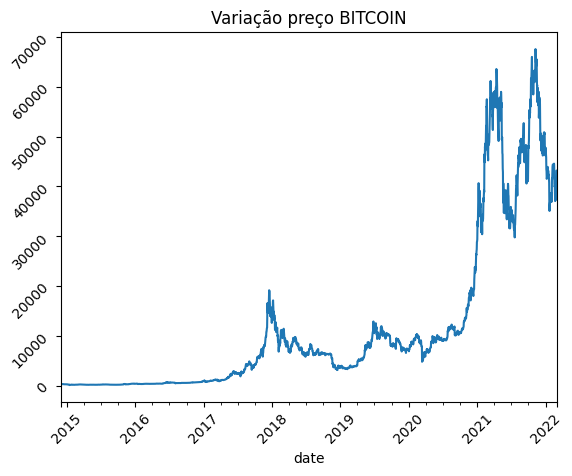

In [9]:

import matplotlib.pyplot as plt

df_dataset['close'].plot()

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Variação preço BITCOIN")
plt.show()

Vamos jogar os valores das colunas high, low e close para uma matriz. Para isso, pode-se usar o atributo *values* do dataframe. Crie uma função que receba uma matriz e um parâmetro chamado estatística que possua um valor padrão "média". Essa função deverá calcular a estatística informada nesse parâmetro, podendo ser: média, mediana, máximo ou mínimo. 

In [10]:
def calEstatisticas(matriz,estatistica = "media"): #caso não for passado um parametro já tera um padrão
    
    result = None

    if estatistica == "media":
        result = np.mean(matriz,axis = 0)
    
    elif estatistica == "mediana":
        result = np.median(matriz, axis = 0)

    elif estatistica == "min":
        result = np.min(matriz, axis = 0)
    
    elif estatistica == "max":
        result = np.max(matriz, axis = 0)

    return result 
        
matriz = df_dataset[['high','low','close']].values

media = calEstatisticas(matriz)
mediana = calEstatisticas(matriz,"mediana")
minimo = calEstatisticas(matriz,estatistica = "min")
maximo = calEstatisticas(matriz,"max")

print(matriz)
print("Media:", media)
print("Mediana:", mediana)
print("Minimo:", minimo)
print("Maximo:", maximo)

[[43626.49 43185.48 43185.48]
 [44256.08 37468.99 43178.98]
 [39886.92 37015.74 37712.68]
 ...
 [  381.99   373.32   373.34]
 [  386.6    372.25   376.72]
 [  381.34   360.57   376.28]]
Media: [12038.56291211 11296.53946058 11709.32621275]
Mediana: [6540.   6312.   6407.77]
Minimo: [212.84 152.4  162.  ]
Maximo: [69000. 66250. 67559.]


Agora, vamos remover algumas colunas da base de dados. Para isso, use o método **drop**, passando para o parâmetro **columns**, uma lista com os nomes das colunas desejadas. 

In [11]:
print(df_dataset.columns)

df_dataset = df_dataset.drop(columns=['unix','symbol'])

display(df_dataset)


Index(['unix', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')


,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2022-03-01,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
2022-02-28,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03


Vamos gerar algumas estatísticas sobre a base de dados usando o próprio Pandas. Para isso, use o método **describe**.

A função `describe()` da `Pandas` sumariza as principais estatísticas sobre os dados de um _data frame_, como a média, o desvio padrão, valor máximo, valor mínimo e alguns percentis.

In [12]:
estatiticas = df_dataset.describe()
display(estatiticas)

,open,high,low,close,Volume BTC,Volume USD
count,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


## Classes

O Python pode ser usado para programação orientada a objetos. Vamos criar uma classe que receba um vetor e tenha métodos para calcular a soma, média e desvio padrão.

In [13]:

class RetornaEstatistica:

    def __init__(self,matriz):
        self.matriz = matriz
    
    def media(self):
        resultado = np.mean(self.matriz, axis = 0)
        return resultado 
    
    def mediana(self):
        resultado = np.median(self.matriz, axis = 0)
        return resultado

#testar a classe
objEstatistica = RetornaEstatistica(matriz)

print("Matriz: ", objEstatistica.matriz)

media = objEstatistica.media()
mediana = objEstatistica.mediana()
print("Media:", media)
print("Mediana", mediana)

Matriz:  [[43626.49 43185.48 43185.48]
 [44256.08 37468.99 43178.98]
 [39886.92 37015.74 37712.68]
 ...
 [  381.99   373.32   373.34]
 [  386.6    372.25   376.72]
 [  381.34   360.57   376.28]]
Media: [12038.56291211 11296.53946058 11709.32621275]
Mediana [6540.   6312.   6407.77]


Use o método **groupby** para agrupar os dados por um determinado critério, como os valores mensais. Esse método pode receber um objeto do tipo **Grouper** que fornece instruções de como deve ser feito o agrupamento e recebe os seguintes parâmetros:
 - key: coluna que deve ser agrupada
 - level: nome do índice 
 - freq: string que determina a frequência, como por exemplo "H", '1d', 'D', 'M', 'Y'

Obs. Caso você queira fazer o agrupamento por uma coluna, use apenas o parâmetro **key** indicado acima. Caso queira trabalhar com o índice, use o parâmetro **level**.


In [14]:
df_datasetGroups = df_dataset.groupby(pd.Grouper(level='date', freq='M'))

i = 0
for name, df in df_datasetGroups:
    print(name)
    print("Media:", df['close'].mean())

    i += 1
    
    # depois de duas iterações, interrompe
    # o laco de repeticao
    if i>=2:
        break

df_media = df_datasetGroups.mean()
display(df_media)



2014-11-30 00:00:00
Media: 375.44666666666666
2014-12-31 00:00:00
Media: 341.8135483870968


,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-30,372.193333,383.310000,368.713333,375.446667,2.370867e+06,6.302890e+03
2014-12-31,343.688387,348.636452,336.454194,341.813548,2.890151e+06,8.538790e+03
2015-01-31,250.943226,260.632903,238.363871,247.703871,5.431845e+06,2.355429e+04
2015-02-28,233.012500,239.859643,226.930357,234.278214,1.906693e+06,8.128419e+03
2015-03-31,268.984516,274.261613,261.617419,268.596774,2.456041e+06,9.173154e+03
...,...,...,...,...,...,...
2021-11-30,60847.510000,62106.503000,59143.207000,60705.494000,2.406693e+03,1.447363e+08
2021-12-31,49673.636129,50794.813226,47969.005484,49328.349032,2.319238e+03,1.147267e+08
2022-01-31,41351.752903,42166.822258,40007.854516,41111.849677,2.318621e+03,9.244537e+07


Podemos extrair estatisticas de cada grupo acima, usando os métodos mean, max, min, etc.

Média de cada mês


,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-30,372.193333,383.310000,368.713333,375.446667,2.370867e+06,6.302890e+03
2014-12-31,343.688387,348.636452,336.454194,341.813548,2.890151e+06,8.538790e+03
2015-01-31,250.943226,260.632903,238.363871,247.703871,5.431845e+06,2.355429e+04
2015-02-28,233.012500,239.859643,226.930357,234.278214,1.906693e+06,8.128419e+03
2015-03-31,268.984516,274.261613,261.617419,268.596774,2.456041e+06,9.173154e+03
...,...,...,...,...,...,...
2021-11-30,60847.510000,62106.503000,59143.207000,60705.494000,2.406693e+03,1.447363e+08
2021-12-31,49673.636129,50794.813226,47969.005484,49328.349032,2.319238e+03,1.147267e+08
2022-01-31,41351.752903,42166.822258,40007.854516,41111.849677,2.318621e+03,9.244537e+07


<Axes: xlabel='date'>

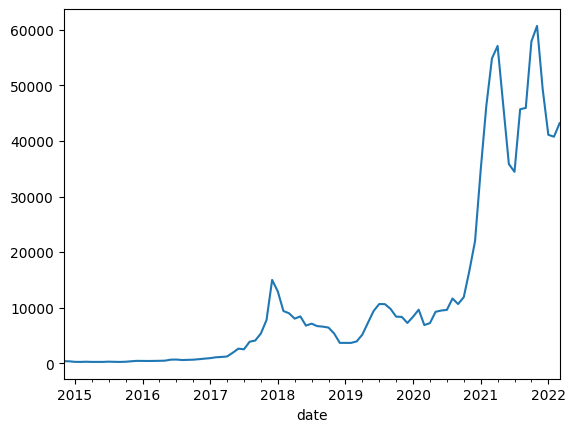

In [15]:
df_mensal = df_datasetGroups.mean()

print("Média de cada mês")
display(df_mensal)

# iremos plotar apenas o valor de fechamendo médio de cada mês
df_mensal['close'].plot()

#print(df_mensal.mean().to_frame())

Outro operação bastante importante é o cálculo de estatísitcas móveis, como a média móvel, onde o valor atual é calculado com base nos n valores valores anteriores. Para isso, pode-se usar a função **rolling** informando a quantidade de dados anteriores que devem ser observados.

<Axes: xlabel='date'>

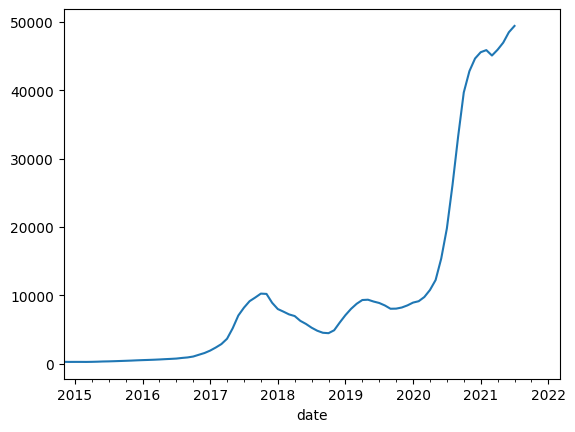

In [16]:
# calcula a média móvel de 200 dias
df_mensal['close'] = df_dataset['close'].rolling(200).mean()
df_mensal['close'].plot()

O Pandas permite concatenar duas bases de dados. Por exemplo, depois que você fez o agrupamento mensal, cada mês pode ser entendido como uma base de dados. Abaixo iremos criar uma base novo juntando os dados o mês zero com o mês 30.

In [17]:
# agrupa os dados por mês
df_intervalGroup = df_dataset.groupby(pd.Grouper(level='date', freq = 'M'))  

i = 0
lista = []
# percorre cada grupo (mês) e guarda a base dentro da variável lista
for name, df in df_intervalGroup:

    lista.append(df)
    
    i += 1
     
# concatena o mês 0 com o mês 10 formando uma nova base de dados
df_novo = pd.concat([lista[0],lista[30]])

display(df_novo)

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-28,363.59,381.34,360.57,376.28,3220878.18,8617.15
2014-11-29,376.42,386.60,372.25,376.72,2746157.05,7245.19
2014-11-30,376.57,381.99,373.32,373.34,1145566.61,3046.33
2017-05-01,1350.21,1425.00,1341.22,1390.86,11920971.92,8602.88
2017-05-02,1390.86,1481.73,1388.00,1447.75,12835457.62,8920.17
2017-05-03,1447.75,1516.04,1431.02,1503.22,16342395.53,11052.34
2017-05-04,1503.22,1623.01,1444.94,1537.23,29012554.52,18824.97
2017-05-05,1537.23,1609.00,1495.00,1514.90,24254113.78,15601.41
2017-05-06,1514.90,1578.97,1505.00,1558.02,12174477.83,7898.17


# Gráficos de *candle*

Podemos gerar uma gráfico *candle* usando a biblioteca **plotly**. 

Abaixo, iremos gerar um gráfico dos últimos 30 dias.

In [18]:
import plotly
import plotly.graph_objects as go

# retorna os primeiros 30 dados
df_dataset30dias = df_dataset.head(n=30)

candlestick = go.Candlestick(
                            x=df_dataset30dias.index,
                            open=df_dataset30dias['open'],
                            high=df_dataset30dias['high'],
                            low=df_dataset30dias['low'],
                            close=df_dataset30dias['close']
                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(xaxis_rangeslider_visible=False,
                 title='Preço do Bitcoin em USD')

fig.show()